# Python de cero a experto
- Python de cero a experto by Luis M. de la Cruz Salas is licensed under Attribution-NonCommercial-NoDerivatives 4.0 International
- Rev: mié 06 ene 2021 13:24:20 CST


## El atractor de Lorenz

El sistema de ecuaciones diferenciales de Lorenz se define como:

$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$

es un conjunto de ecuaciones diferenciales no-lineales. Estas ecuaciones exhiben un comportamiento particular para valores diferentes de $\sigma$, $\beta$, $\rho$. La siguiente es una implementación de la solución de estas ecuaciones y da como resultado trayectorias en el espacio.

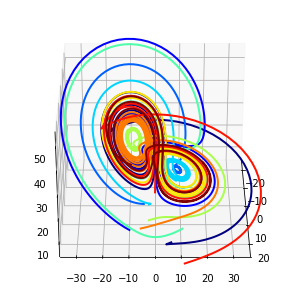

In [14]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def solve_lorenz(N=5, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):
    """
    Función para resolver las ecuaciones de Lorenz.
    """
    # Generamos la figura en 3D
    fig = plt.figure();
    ax = fig.add_axes([0, 0, 1, 1], projection='3d');

    # Limites de los ejes
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """
        Calcula las derivadas temporales de un sistema de Lorenz.
        """
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Seleccionamos puntos aleatorios para iniciar las trayectorias. 
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Calculamos las trayectorias.
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t) for x0i in x0])
    
    # Seleccionamos un color diferente para cada trayectoria.
    colors = plt.cm.jet(np.linspace(0, 1, N));

    # Dibujamos las trayectorias.
    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

t, x_t = solve_lorenz(angle=0, N=10)

Ahora realizamos el cálculo de manera interactiva con la ayuda de la biblioteca IPyWidgets

In [40]:
from ipywidgets import interact, interactive, widgets
from IPython.display import clear_output, display, HTML

print('Mueva los *sliders* a diferentes valores y observe el cambio en la gráfica.')
w = interactive(solve_lorenz, 
                angle=widgets.FloatSlider(min=0.0, max=360.0, value=15.0, description='Ángulo'), 
                max_time=widgets.FloatSlider(min=0.1, max=4.0, value=2.0,description='Tiempo máx.'), 
                N=widgets.IntSlider(min=1, max=10, value=5, description='Trayectorias'), 
                sigma=widgets.FloatSlider(min=0.0, max=50.0, value=10.0, description='\u03c3'),
                beta=widgets.FloatSlider(min=0.0, max=8.0, value=8.0/3.0, description='\u03b2'),
                rho=widgets.FloatSlider(min=0.0, max=50.0, value=28.0, description='\u03c1'))
display(w)

Mueva los *sliders* a diferentes valores y observe el cambio en la gráfica.


interactive(children=(IntSlider(value=5, description='Trayectorias', max=10, min=1), FloatSlider(value=15.0, d…